In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Load data
df = pd.read_csv('diabetes[1].csv')

In [3]:
#View basic information
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#Check for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

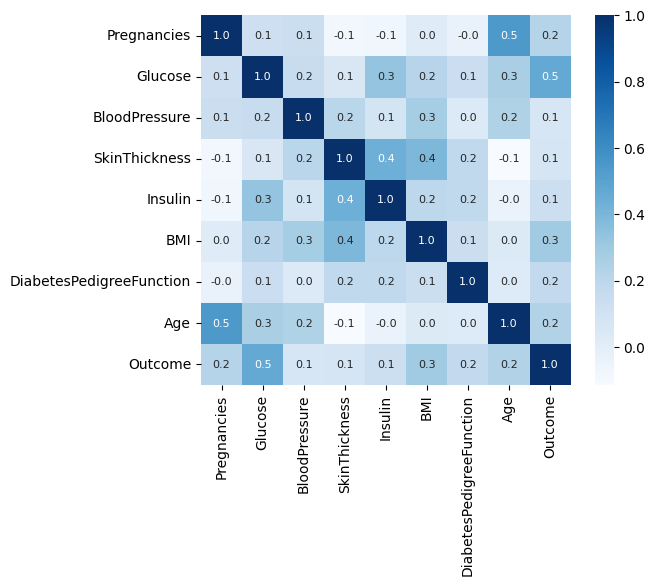

In [8]:
#Correlation Analysis
correlation = df.corr()
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()


In [33]:
#Split our data into X and y
X = df.drop(columns='Outcome', axis=1)
y = df['Outcome']

In [10]:
X,y

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0              6      148             72             35        0  33.6   
 1              1       85             66             29        0  26.6   
 2              8      183             64              0        0  23.3   
 3              1       89             66             23       94  28.1   
 4              0      137             40             35      168  43.1   
 ..           ...      ...            ...            ...      ...   ...   
 763           10      101             76             48      180  32.9   
 764            2      122             70             27        0  36.8   
 765            5      121             72             23      112  26.2   
 766            1      126             60              0        0  30.1   
 767            1       93             70             31        0  30.4   
 
      DiabetesPedigreeFunction  Age  
 0                       0.627   50  
 1                    

In [34]:
#Split data into Training data and Test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 42)

In [35]:
X_train.shape, X_test.shape

((537, 8), (231, 8))

In [13]:
#Import libraries of statsmodels for Logistic Regression based binary classifier: Part 1
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as smf
from statsmodels.formula.api import logit

In [14]:
#Define the formula to perform classification
formula = 'Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age'

In [15]:
#Define the logistic regression model
model = logit(formula = formula, data = df).fit()

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6


In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Tue, 11 Jun 2024   Pseudo R-squ.:                  0.2718
Time:                        19:02:38   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -8.4047      0.717    -11.728      0.000      -9.809      -7.000
Pregnancies                  0.1232      0.032      3.840      0.000       0.060       0.186
Glucose                      0.0352      0.004      9.481      0.000       0.028       0.042
BloodPressure               -0.0133      0.005     -2.540      0.011      -0.024      -0.003
SkinThickness                0.0006      0.007      0.090      0.929      -0.013       0.014
Insulin                     -0.0012      0.001     -1.322      0.186      -0.003       0.001
BMI                          0.0897      0.015      5.945      0.000       0.060       0.119
DiabetesPedigreeFunction     0.9452      0.299      3.160      0.002       0.359       1.531
Age                          0.0149      0.009      1.593      0.111      -0.003       0.033
============================================================================================
"""

In [18]:
#Odds Ratio
print(np.exp(model.params))

Intercept                   0.000224
Pregnancies                 1.131091
Glucose                     1.035789
BloodPressure               0.986792
SkinThickness               1.000619
Insulin                     0.998809
BMI                         1.093847
DiabetesPedigreeFunction    2.573276
Age                         1.014980
dtype: float64


In [27]:
#import classification metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [21]:
#Predict the model
y_pred = model.predict(X_test)

In [22]:
y_pred

668    0.249540
324    0.176115
624    0.120555
690    0.231635
473    0.417570
         ...   
619    0.304963
198    0.341368
538    0.294870
329    0.176961
302    0.089731
Length: 231, dtype: float64

In [23]:
#Manipulate the predicted value y_pred > 0.7 as 1 and y_pred< 0.7 as 0
cutoff = 0.7
y_predictions = np.where(y_pred > cutoff, 1, 0)

In [24]:
y_actual = y_test

In [31]:
accuracy = accuracy_score(y_actual, y_predictions)
print('Accuracy: %.2f' % accuracy + '%')

Accuracy: 0.76%


In [36]:
#Import Sklearn library for Logistic Regression (Optional)
from sklearn.linear_model import LogisticRegression

In [37]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [38]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [40]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7402597402597403
Confusion Matrix:
 [[121  30]
 [ 30  50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

